In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# get HCFAI

In [2]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
region = 8
data_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_cleaned_sum.csv'
df = pd.read_csv(data_path)
df.head(2)

,ID,barangay_name,city_name,province_name,children_m,elderly_me,women_mean,youth_mean,women_repr,allph_mean,...,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,youth_children_sum,youth_elderly_sum,youth_phall_sum,youth_women_sum,youth_women_repr_sum,youth_youth_sum
0,3164370,Bongalonan,Basay,Negros Oriental,2.432361,1.263453,10.803811,4.916292,5.199925,0.540207,...,0,0,3187871,25.971035,2.432361,1.263453,22.647606,10.803811,5.199925,4.916292
1,3164371,Bongalonan,Basay,Negros Oriental,2.432361,1.263453,10.803811,4.916292,5.199925,1.531762,...,0,0,3187871,25.450296,2.432361,1.263453,22.647606,10.803811,5.199925,4.916292


In [3]:
df[df['Distance_to_Nearest_RHU_km'] <= 1.65]

,ID,barangay_name,city_name,province_name,children_m,elderly_me,women_mean,youth_mean,women_repr,allph_mean,...,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,youth_children_sum,youth_elderly_sum,youth_phall_sum,youth_women_sum,youth_women_repr_sum,youth_youth_sum
230,3186489,Tinago (Pob.),City of Bayawan (Tulong),Negros Oriental,1.539690,1.437837,7.619125,2.902491,3.840045,23.058666,...,1,1,3187871,1.315628,81.603574,76.205366,809.272573,403.813632,203.522368,153.832044
254,3187871,Ubos (Pob.),City of Bayawan (Tulong),Negros Oriental,1.896125,1.820273,9.539125,3.749403,4.846201,39.942108,...,1,1,3187871,0.445957,1215.416154,1166.795142,12231.256847,6114.579121,3106.415135,2403.367095
255,3187872,Villareal,City of Bayawan (Tulong),Negros Oriental,2.342167,3.096573,14.158269,5.579095,7.561603,71.758419,...,1,0,3187871,0.607773,11.710835,15.482865,142.109020,70.791345,37.808015,27.895475
281,3189253,Villareal,City of Bayawan (Tulong),Negros Oriental,1.424162,1.133301,7.067083,2.765810,3.739853,13.577895,...,1,1,3187871,1.493488,388.796325,309.391267,3862.024316,1929.313656,1020.979967,755.066219
1080,3211385,Mantuyop,Siaton,Negros Oriental,1.033080,1.102682,5.232786,1.974231,2.565807,10.730137,...,0,1,3211385,0.812306,307.857952,328.599300,3166.076280,1559.370241,764.610613,588.320710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,3349511,Poblacion,Talibon,Bohol,1.637462,1.962210,9.660109,3.613393,4.880367,73.246769,...,0,1,3348130,0.352280,26.199392,31.395360,296.243328,154.561744,78.085872,57.814288
6771,3368878,Poblacion I,Mabini,Bohol,0.671275,0.806683,3.071339,1.015554,1.376419,4.058573,...,0,1,3370261,0.931126,136.268785,163.756734,1221.022347,623.481888,279.413080,206.157415
6772,3368879,Poblacion II,Mabini,Bohol,0.673035,0.802734,3.042678,1.002541,1.367102,1.563609,...,0,0,3370261,1.313916,0.673035,0.802734,5.948645,3.042678,1.367102,1.002541
6804,3370260,Cawayanan,Mabini,Bohol,0.331965,0.388660,1.739675,0.657831,0.807169,2.831350,...,0,0,3370261,1.643714,78.675815,92.112302,829.900049,412.302874,191.298962,155.906061


In [5]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name', 'children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'allph_mean',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you'],
      dtype='object')

In [6]:
# Rename columns
column_mapping = {
    'youth_children_sum': 'popden_chi',
    'youth_elderly_sum': 'popden_eld',
    'youth_women_sum': 'popden_wom',
    'youth_women_repr_sum': 'popden_w_1',
    'youth_youth_sum': 'popden_you',
    'youth_phall_sum': 'popden_all',
}


df = df.rename(columns=column_mapping)
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df[df['RHU_Presence'] == 1]

dropcols = ['children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'allph_mean']
df = df.drop(columns=dropcols)

# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [7]:
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,3164370,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,0,3187871,25.971035,2.432361,1.263453,22.647606,10.803811,5.199925,4.916292
1,3164371,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,0,3187871,25.450296,2.432361,1.263453,22.647606,10.803811,5.199925,4.916292
2,3164372,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,0,3187871,25.225533,2.270979,1.179626,21.144988,10.087002,4.854922,4.590107
3,3165752,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,0,3187871,25.398884,7.297083,3.790359,67.942818,32.411433,15.599775,14.748876
4,3165753,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,0,3187871,25.042725,14.594166,7.580718,135.885636,64.822866,31.199550,29.497752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6928,3378537,Kabangkalan,President Carlos P. Garcia (Pitogo),Bohol,1.441086,1.606593,0.626593,0.0,0,0,0,3370261,27.636793,15.761890,20.611718,124.882748,54.560412,19.399278,10.103780
6929,3378538,Kabangkalan,President Carlos P. Garcia (Pitogo),Bohol,1.441086,1.606593,0.626593,0.0,0,0,0,3370261,26.548798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6930,3379915,Tugas,President Carlos P. Garcia (Pitogo),Bohol,1.357690,1.614995,0.555917,0.0,0,0,1,3348130,31.655614,42.033024,33.949728,298.272744,140.244768,61.028712,46.074672
6931,3381299,Tilmobo,President Carlos P. Garcia (Pitogo),Bohol,0.008577,1.612559,0.604537,NaN,0,0,0,3370261,31.801069,8.558496,16.641520,93.668000,45.169856,16.166048,16.641520


In [8]:
# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [9]:
# Impute NaNs with 0, considering data type safety
for col in columns_with_nan:
    # Check data type before imputing (avoid unintended conversions)
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)  # Impute with 0 for numeric columns
    else:
        df[col] = df[col].fillna('NA')  # Impute with 'NA' for non-numeric columns
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,3164370,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,0,3187871,25.971035,2.432361,1.263453,22.647606,10.803811,5.199925,4.916292
1,3164371,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,0,3187871,25.450296,2.432361,1.263453,22.647606,10.803811,5.199925,4.916292
2,3164372,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,0,3187871,25.225533,2.270979,1.179626,21.144988,10.087002,4.854922,4.590107
3,3165752,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,0,3187871,25.398884,7.297083,3.790359,67.942818,32.411433,15.599775,14.748876
4,3165753,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,0,3187871,25.042725,14.594166,7.580718,135.885636,64.822866,31.199550,29.497752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6928,3378537,Kabangkalan,President Carlos P. Garcia (Pitogo),Bohol,1.441086,1.606593,0.626593,0.0,0,0,0,3370261,27.636793,15.761890,20.611718,124.882748,54.560412,19.399278,10.103780
6929,3378538,Kabangkalan,President Carlos P. Garcia (Pitogo),Bohol,1.441086,1.606593,0.626593,0.0,0,0,0,3370261,26.548798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6930,3379915,Tugas,President Carlos P. Garcia (Pitogo),Bohol,1.357690,1.614995,0.555917,0.0,0,0,1,3348130,31.655614,42.033024,33.949728,298.272744,140.244768,61.028712,46.074672
6931,3381299,Tilmobo,President Carlos P. Garcia (Pitogo),Bohol,0.008577,1.612559,0.604537,0.0,0,0,0,3370261,31.801069,8.558496,16.641520,93.668000,45.169856,16.166048,16.641520


In [10]:
columns_with_nan = [col for col in df.columns if df[col].isna().any()]
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [11]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [12]:
# VARIABLES
# population vulnerable
popall = df["popden_all"]
children = df["popden_chi"]
elderly = df["popden_eld"]
women = df["popden_wom"]
women_reproductive = df["popden_w_1"]
youth = df["popden_you"]
distance = df["Distance_to_Nearest_RHU_km"]

flood = df["flood_probability_value"]
rain_intensity = df["rain intensity_value"]
drought = df["drought_value"]
roads = df["Road_Presence"]
rhus = df["RHU_Presence"]
pois = df["POI_Presence"]
buildability = df["buildability_landcov"]

In [13]:
df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

# Data exploration and visualization

In [14]:
print(max(list(df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
# for col in df.columns:
#   print(col)

0.6306097079892774
0.3416353615938532


In [15]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x=df[['popden_all', 'popden_you', "popden_w_1",
                      "popden_wom", "popden_eld", 'popden_chi',
                      'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                      'buildability_landcov', "drought_value", "rain intensity_value",
                         "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 4701 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
1424,77.689213,14.643552,16.870371,37.392719,5.736283,9.833628,16.696912,1,1,0,1.0,0.904475,0.705259,0.189079,0.630610
1348,300.950970,62.063820,62.063820,139.819260,19.673070,39.814530,17.030123,1,1,0,1.0,0.904475,0.705259,0.189079,0.630435
1753,193.791640,35.326592,45.644200,93.419256,19.177312,19.513760,11.883904,1,1,0,1.0,1.051270,0.681807,0.004539,0.629775
2714,256.087809,49.260261,59.344458,128.171649,26.317866,25.505190,7.116695,1,1,0,1.0,0.781498,1.156937,0.189978,0.624912
2672,628.380384,120.570273,157.787166,306.962115,54.133593,62.130597,6.104618,1,1,0,1.0,0.797541,1.153183,0.195379,0.624012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6831,345.009332,67.135696,77.782024,166.947096,35.363716,36.044444,10.755881,0,0,0,0.0,0.841043,1.561330,1.493826,0.345727
6830,10.605544,1.393188,2.135124,5.391392,1.220070,1.265410,12.306270,0,0,0,0.0,0.841043,1.561330,1.493826,0.345710
4361,9.307326,1.662022,2.129466,4.560174,1.142640,0.934888,26.759565,0,0,0,0.0,1.012505,1.553418,1.257971,0.345029
4434,33.655520,6.404550,8.594245,16.808775,2.025155,4.176880,43.359858,0,0,0,0.0,0.942243,1.758813,1.281207,0.343014


In [16]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
locs_with_RHU

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
6105,1985.533570,351.378785,447.463581,988.631588,220.013842,207.311599,0.0,1,1,1,1.0,1.025623,1.267079,0.704858,0.590019
3080,271.706170,52.553807,58.747512,133.864335,29.454861,26.378306,0.0,1,0,1,1.0,0.938575,0.796687,0.217229,0.565051
2747,4910.971343,961.983229,1129.423964,2364.479244,256.592591,589.141810,0.0,1,0,1,1.0,0.865834,1.148903,0.186140,0.558749
1080,3166.076280,588.320710,764.610613,1559.370241,328.599300,307.857952,0.0,1,0,1,1.0,1.052056,0.648704,0.782457,0.538134
3011,4409.707484,877.768129,1076.427064,2164.560220,330.122928,543.915588,0.0,1,0,1,1.0,0.897328,1.224643,0.895214,0.522456
4671,17840.175192,3469.786009,4666.362132,8760.902443,916.042365,2175.451981,0.0,1,0,1,1.0,0.803430,1.517107,0.666709,0.521717
2842,1964.849645,383.781005,464.153310,978.933210,233.070965,186.309685,0.0,1,1,1,0.0,0.799484,1.081564,0.291190,0.512756
3905,9971.818558,1966.004518,2529.184728,4984.491748,919.335509,1033.855766,0.0,1,1,1,0.0,0.930639,1.472464,0.004174,0.501447
3387,420.278619,77.250344,97.068469,200.048246,60.833452,32.139156,0.0,1,1,1,0.0,0.850404,1.018598,0.534091,0.500356
4254,81989.640013,17715.440249,23788.905133,41954.846603,5443.477180,8140.575095,0.0,1,1,1,0.0,0.948619,1.454777,0.675654,0.493958


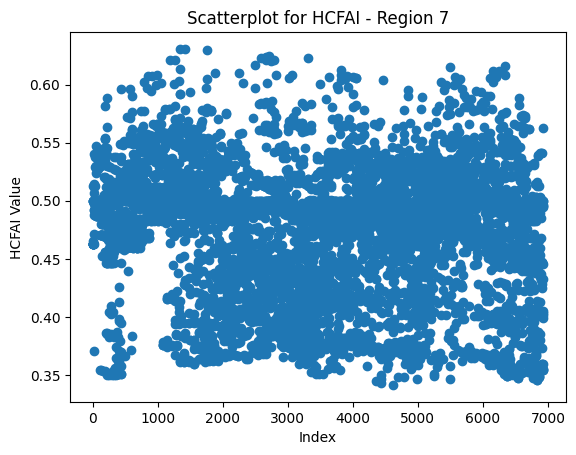

In [17]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title(f'Scatterplot for HCFAI - Region {region-1}')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [ ]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
2636,1,1,0,1.0,0.688586,1.127687,0.189871,0.657646
2633,1,1,0,1.0,0.688586,1.127687,0.189871,0.657646
2018,1,1,0,1.0,0.713296,1.477339,0.524898,0.643539
2148,1,1,0,1.0,0.887326,1.078612,0.461871,0.640074
4605,1,1,0,1.0,0.602418,2.223588,0.470621,0.639773
...,...,...,...,...,...,...,...,...
3062,0,0,0,0.0,1.359662,2.064010,1.132209,0.344480
2683,0,0,0,0.0,1.417323,2.017259,1.018695,0.344146
2599,0,0,0,0.0,1.417323,2.017259,1.018695,0.344146
2775,0,0,0,0.0,1.415058,2.017468,1.079665,0.343030


# Maximal Coverage Factors

In [ ]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
2633,0.462968,1.197965,0.142053,0.309987,0.598695,0.131234,22.808192,0,0.657646
2636,0.462968,1.197965,0.142053,0.309987,0.598695,0.222967,18.998063,0,0.657646
2018,2.363027,5.847296,0.640863,1.307103,3.174695,26.355544,10.321935,0,0.643539
2148,5.882630,15.921712,1.352289,3.864680,8.372308,3.568439,12.601937,0,0.640074
4605,5.270356,14.251041,1.475700,3.794656,7.420661,0.530137,20.907070,0,0.639773
...,...,...,...,...,...,...,...,...,...
3061,0.761132,2.165091,0.278432,0.503753,1.142673,3.668469,7.764747,0,0.344480
2683,2.505617,6.086964,0.701073,1.403070,3.250526,11.153110,2.685554,0,0.344146
2599,1.861765,4.675495,0.678184,0.869920,2.423505,12.742518,3.442872,0,0.344146
2776,2.277814,5.863148,0.867955,1.346539,3.047312,6.706934,5.510741,0,0.343030


# EDA

In [ ]:
c=df['HCFAI'].notna()
c = df[c]
# c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c = c[c['RHU_Presence']==1]
c = c.sort_values(by='HCFAI', ascending=False)
c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
       'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
        'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
        'flood_probability_value', 'HCFAI']]
c.sort_values(by='HCFAI', ascending=False)

KeyError: "['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5', 'population_reproductive_women', 'popden_all_total_population'] not in index"

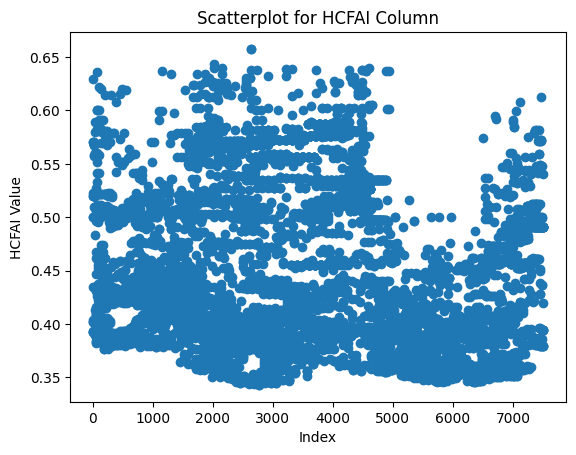

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [18]:
# Specify the file path for the CSV file
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/RG8/rg8_HCFAI_sum.csv
